# Spam Mail Classifier

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Part 1: NLP library. Make sure you had install nltk and wordcloud librarying using pip, and run the following download

In [17]:
import nltk
# pip install nltk
# pip install wordcloud
# pip install textblob
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fuadhassan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fuadhassan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fuadhassan/nltk_data...


True

### Dataset

Spam Mail Dataset collection 

https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection


In [4]:
lines = open('Data/SMSSpamCollection').readlines()
print(len(lines))

5574


In [5]:
for l in lines[:5]:
    print(l.strip())

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though


In [6]:
# Turn them into a dataframe
print(lines[0].split('\t'))

['ham', 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n']


In [7]:
label = []
mail = []
for l in lines:
    lbl, txt = l.strip().split('\t')
    label.append(lbl)
    mail.append(txt)

In [8]:
df = pd.DataFrame({'label': label, 'mail': mail})
df.head()

,label,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Part 2: EDA

<AxesSubplot:xlabel='label', ylabel='count'>

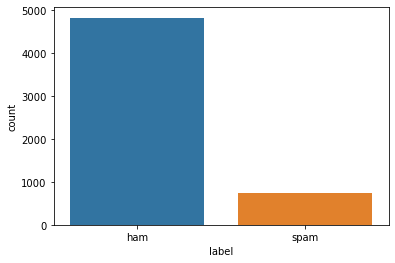

In [8]:
sns.countplot(df['label'])

In [9]:
# add a len column
df['len'] = df['mail'].apply(lambda x: len(x))
df.head()

,label,mail,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Figure size 1200x400 with 0 Axes>

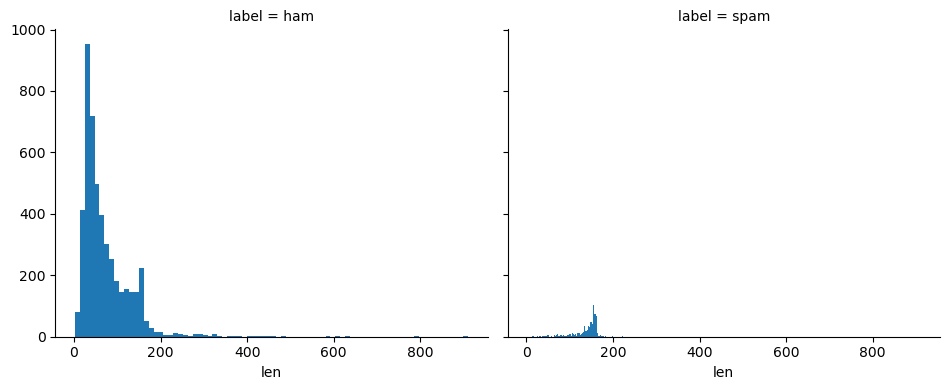

In [10]:
plt.figure(figsize=(12, 4))
g = sns.FacetGrid(df, col='label', height=4, aspect=1.2)
g = g.map(plt.hist, 'len', bins=80)

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

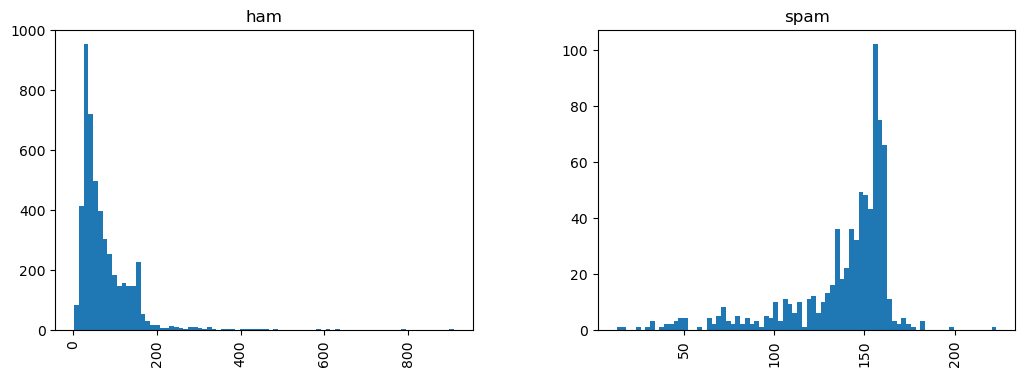

In [11]:
df.hist(column='len', by='label', bins=80, figsize=(12, 4))

### Part 3: Let's go through some of the fundamental NLP concepts before we build a model

### Tokenizer


In [12]:
# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize

In [18]:
token = word_tokenize('Hello Professor Pang. How is your day?')
print(token)

['Hello', 'Professor', 'Pang', '.', 'How', 'is', 'your', 'day', '?']


In [19]:
for index, row in df.iterrows():
    print(index, word_tokenize(row['mail']))

0 ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']
1 ['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...']
2 ['Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', '.', 'Text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'question', '(', 'std', 'txt', 'rate', ')', 'T', '&', 'C', "'s", 'apply', '08452810075over18', "'s"]
3 ['U', 'dun', 'say', 'so', 'early', 'hor', '...', 'U', 'c', 'already', 'then', 'say', '...']
4 ['Nah', 'I', 'do', "n't", 'think', 'he', 'goes', 'to', 'usf', ',', 'he', 'lives', 'around', 'here', 'though']
5 ['FreeMsg', 'Hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'I', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', '£1.50', 'to

### Finding frequency of words

In [20]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'Hello': 1, 'Professor': 1, 'Pang': 1, '.': 1, 'How': 1, 'is': 1, 'your': 1, 'day': 1, '?': 1})

In [21]:
for index, row in df.iterrows():
    fdist = FreqDist(word_tokenize(row['mail']))
    fdist

In [22]:
print(fdist)

<FreqDist with 7 samples and 7 outcomes>


In [23]:
fdist1 = fdist.most_common(10)

In [24]:
fdist1

[('Rofl', 1),
 ('.', 1),
 ('Its', 1),
 ('true', 1),
 ('to', 1),
 ('its', 1),
 ('name', 1)]

### Stop words

In [25]:
from nltk.corpus import stopwords
a = set(stopwords.words('english'))
a

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Show Common Words in Spam using WordCloud

In [27]:
from wordcloud import WordCloud

In [28]:
list(df[df['label'] == 'spam']['mail'])

["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030',
 'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info',
 'URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18',
 'XXXMobileMovieClub: To use your credit, click the WAP link in th

In [29]:
spam_words = ' '.join(list(df[df['label'] == 'spam']['mail']))

In [30]:
spam_words

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message o

In [31]:
spam_wc = WordCloud(width=512, height=512).generate(spam_words)

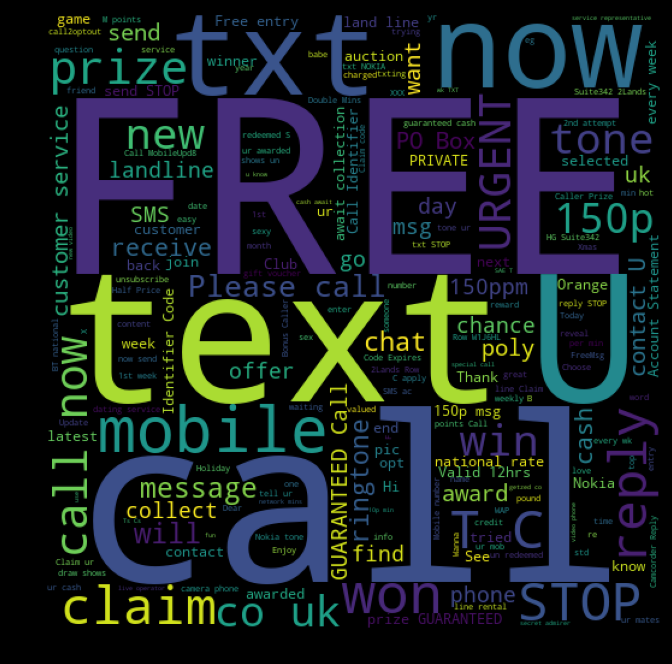

In [32]:
plt.figure(figsize=(10, 8), facecolor='k')
plt.imshow(spam_wc)

### Stemming and Lemmatization

In [33]:
# Importing Porterstemmer from nltk library
# Checking for the word ‘giving’
from nltk.stem import PorterStemmer
pst = PorterStemmer()
print(pst.stem('waiting'))
print(pst.stem('waited'))
print(pst.stem('gone'))
print(pst.stem('go'))
print(pst.stem('went'))

wait
wait
gone
go
went


In [34]:
# Importing Lemmatizer library from nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print('rocks :', lemmatizer.lemmatize('rocks'))
print('corpora :', lemmatizer.lemmatize('corpora'))
print('gone :', lemmatizer.lemmatize('gone'))
print('go :', lemmatizer.lemmatize('go'))
print('went :', lemmatizer.lemmatize('went'))

rocks : rock
corpora : corpus
gone : gone
go : go
went : went


In [36]:
# Use TextBlob to lemmatize and part of speech
from textblob import Word, TextBlob
w = Word('going')
w.lemmatize("v")  # v means verb

'go'

In [37]:
w = Word('gone')
w.lemmatize("v")

'go'

In [38]:
w = Word('went')
w.lemmatize("v")

'go'

In [39]:
# Fun Spelling correction using TextBlob
txt = "CS381 class is a gret for learnng data scence!"
blob = TextBlob(txt)
blob.correct()

TextBlob("CS381 class is a great for learning data science!")

In [40]:
# Fun Spelling correction using TextBlob
txt = "Professor Pang's data analyti clas is gret for learnng data scence! Yea!"
blob = TextBlob(txt)
blob.correct()

TextBlob("Professor Sang's data analysis class is great for learning data science! Tea!")

### Part 4:  Now we have covered the concepts, let's use them to build our model

* Step 1: define logic to remove stop words 
* Step 2: create the term by document matrix (rows are the document, columns are words)
* Step 3: calculate the TD-IDF matrix from the term by document matrix
* Step 4: Use the TD-IDF as the features, Pick a classfication model
* Step 5: Run the classification model, check the model performance

### Step 1, clean up the text so it only has meaningful words

In [41]:
import string
from nltk.stem import PorterStemmer
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
def clean_text(text, lower_case=True, stem=True, stop_words=True):
    # On given a text, remove punctuation and stop words
    # remove punctuation
    if lower_case:
        text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = word_tokenize(text)
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    return (words)

In [43]:
df['mail'].head(5)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: mail, dtype: object

In [44]:
df['mail'].head(5).apply(clean_text)

0    [go, jurong, point, crazi, avail, bugi, n, gre...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entri, 2, wkli, comp, win, fa, cup, fin...
3        [u, dun, say, earli, hor, u, c, alreadi, say]
4    [nah, dont, think, goe, usf, live, around, tho...
Name: mail, dtype: object

### Step 2, create the Term-Document Matrix by counting the frequeny of the words

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
# Use the CountVectorizer to count the frequency of the words after we call clean_text
bag_of_words_transformer = CountVectorizer(analyzer=clean_text).fit(df['mail'])

In [47]:
bag_of_words_transformer.vocabulary_

{'go': 3303,
 'jurong': 4092,
 'point': 5585,
 'crazi': 2218,
 'avail': 1311,
 'bugi': 1718,
 'n': 4917,
 'great': 3392,
 'world': 7857,
 'la': 4238,
 'e': 2658,
 'buffet': 1716,
 'cine': 1998,
 'got': 3355,
 'amor': 1122,
 'wat': 7654,
 'ok': 5212,
 'lar': 4273,
 'joke': 4058,
 'wif': 7769,
 'u': 7362,
 'oni': 5242,
 'free': 3116,
 'entri': 2770,
 '2': 414,
 'wkli': 7816,
 'comp': 2094,
 'win': 7782,
 'fa': 2890,
 'cup': 2265,
 'final': 2992,
 'tkt': 7167,
 '21st': 434,
 'may': 4633,
 '2005': 421,
 'text': 7024,
 '87121': 844,
 'receiv': 5913,
 'questionstd': 5824,
 'txt': 7349,
 'ratetc': 5871,
 'appli': 1194,
 '08452810075over18': 72,
 'dun': 2645,
 'say': 6186,
 'earli': 2662,
 'hor': 3681,
 'c': 1760,
 'alreadi': 1094,
 'nah': 4924,
 'dont': 2565,
 'think': 7094,
 'goe': 3315,
 'usf': 7479,
 'live': 4392,
 'around': 1233,
 'though': 7110,
 'freemsg': 3124,
 'hey': 3589,
 'darl': 2320,
 '3': 524,
 'week': 7692,
 'word': 7846,
 'back': 1358,
 'id': 3786,
 'like': 4361,
 'fun': 3180,

In [48]:
print(len(bag_of_words_transformer.vocabulary_))

8170


### We have converted each text as a vector in the 8195 dimensional space

In [49]:
txt1 = df['mail'][0]

In [50]:
txt1

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [51]:
vec1 = bag_of_words_transformer.transform([txt1])
print(vec1)

  (0, 1122)	1
  (0, 1311)	1
  (0, 1716)	1
  (0, 1718)	1
  (0, 1998)	1
  (0, 2218)	1
  (0, 2658)	1
  (0, 3303)	1
  (0, 3355)	1
  (0, 3392)	1
  (0, 4092)	1
  (0, 4238)	1
  (0, 4917)	1
  (0, 5585)	1
  (0, 7654)	1
  (0, 7857)	1


In [52]:
print(bag_of_words_transformer.get_feature_names()[1122])
print(bag_of_words_transformer.get_feature_names()[1311])

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

Now we can use **.transform** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. 

In [56]:
term_by_document_matrix = bag_of_words_transformer.transform(df['mail'])

In [58]:
term_by_document_matrix.shape

(5574, 8195)

we have 5574 mail, and 8195 distinct words, the cell of the matrix is either 1 or 0. Most of them are 0

The Term by Document Matrix is a huge Sparse Matrix

In [60]:
print('Number of Non-Zero cell: ', term_by_document_matrix.nnz)

Number of Non-Zero cell:  49995


### Step 3: Calculate the TF-IDF matrix

In [62]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(term_by_document_matrix)

In [63]:
tfidf = tfidf_transformer.transform(term_by_document_matrix)
tfidf.shape

(5574, 8195)

In [64]:
tfidf

<5574x8195 sparse matrix of type '<class 'numpy.float64'>'
	with 49995 stored elements in Compressed Sparse Row format>

### Step 4: Choose a Naive Bayes Classifier

In [65]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
model = MultinomialNB()

### Step 5: Run the model and check the model performance

In [67]:
from sklearn.model_selection import train_test_split
X = tfidf
Y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)

['ham' 'ham' 'ham' ... 'ham' 'spam' 'ham']


In [68]:
from sklearn.metrics import classification_report
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       982
        spam       1.00      0.75      0.86       133

   micro avg       0.97      0.97      0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



### Good Job!  Well Done

### Now try filter new spam email

In [75]:
txt = 'XXXX!, you have won Free entry to Hawaii, call now'
#txt = 'Congradulation!, you won something Free prize call now '
bow = bag_of_words_transformer.transform([txt])
print(bow)
print("term-by-document matrix")
print(bow)
X = tfidf_transformer.transform(bow)
print("TF-IDF")
print(X)
print(model.predict(X))

  (0, 1777)	1
  (0, 2777)	1
  (0, 3123)	1
term-by-document matrix
  (0, 1777)	1
  (0, 2777)	1
  (0, 3123)	1
TF-IDF
  (0, 3123)	0.49990292213597415
  (0, 2777)	0.7759879201582642
  (0, 1777)	0.3846294531212674
['spam']


In [76]:
print(bag_of_words_transformer.get_feature_names()[1777])
print(bag_of_words_transformer.get_feature_names()[2777])
print(bag_of_words_transformer.get_feature_names()[3123])

call
entri
free
